In [1]:
from bread.data import Segmentation, Microscopy
import os
import glob
import tifffile
import numpy as np
from pathlib import Path
import bread.vis as vis
import matplotlib.pyplot as plt

datadir = Path('../../data/data_from_s41592-022-01603-2/TTDSCerevisiae7')
segpath = datadir / 'TTD_SCerevisiae_7_segmented_raw.2023-02-05.h5'

In [2]:
import h5py
file = h5py.File(segpath, 'r')
print(file['FOV0'].keys())
print(len(file['FOV0'].keys()))
for key in file['FOV0']:
	print(file['FOV0'][key])
file.close()

<KeysViewHDF5 ['T0', 'T1', 'T10', 'T100', 'T101', 'T102', 'T103', 'T104', 'T105', 'T106', 'T11', 'T118', 'T119', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T2', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T3', 'T30', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T37', 'T38', 'T39', 'T4', 'T40', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T48', 'T49', 'T5', 'T50', 'T51', 'T52', 'T53', 'T54', 'T55', 'T56', 'T57', 'T58', 'T59', 'T6', 'T60', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T67', 'T68', 'T69', 'T7', 'T70', 'T71', 'T72', 'T73', 'T74', 'T75', 'T76', 'T77', 'T78', 'T79', 'T8', 'T80', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86', 'T87', 'T88', 'T89', 'T9', 'T90', 'T91', 'T92', 'T93', 'T94', 'T95', 'T96', 'T97', 'T98', 'T99']>
109
<HDF5 dataset "T0": shape (2048, 2048), type "<u2">
<HDF5 dataset "T1": shape (2048, 2048), type "<u2">
<HDF5 dataset "T10": shape (2048, 2048), type "<f8">
<HDF5 dataset "T100": shape (2048, 2048), type "<f8">
<HDF5 d

In [3]:
seg = Segmentation.from_h5(segpath, load_frames=range(104))

In [4]:
len(seg)

104

/run/media/nicole/nicole_data/Documents/2018 EPFL/PH MA 2/TP4/bread paper/bread-git/bread/src/bread/data/_data.py:170: UserWarning: Microscopy was given data with 2 dimensions, adding an empty dimension for time.
  warnings.warn('Microscopy was given data with 2 dimensions, adding an empty dimension for time.')


(<Figure size 2000x2000 with 1 Axes>, <AxesSubplot:>)

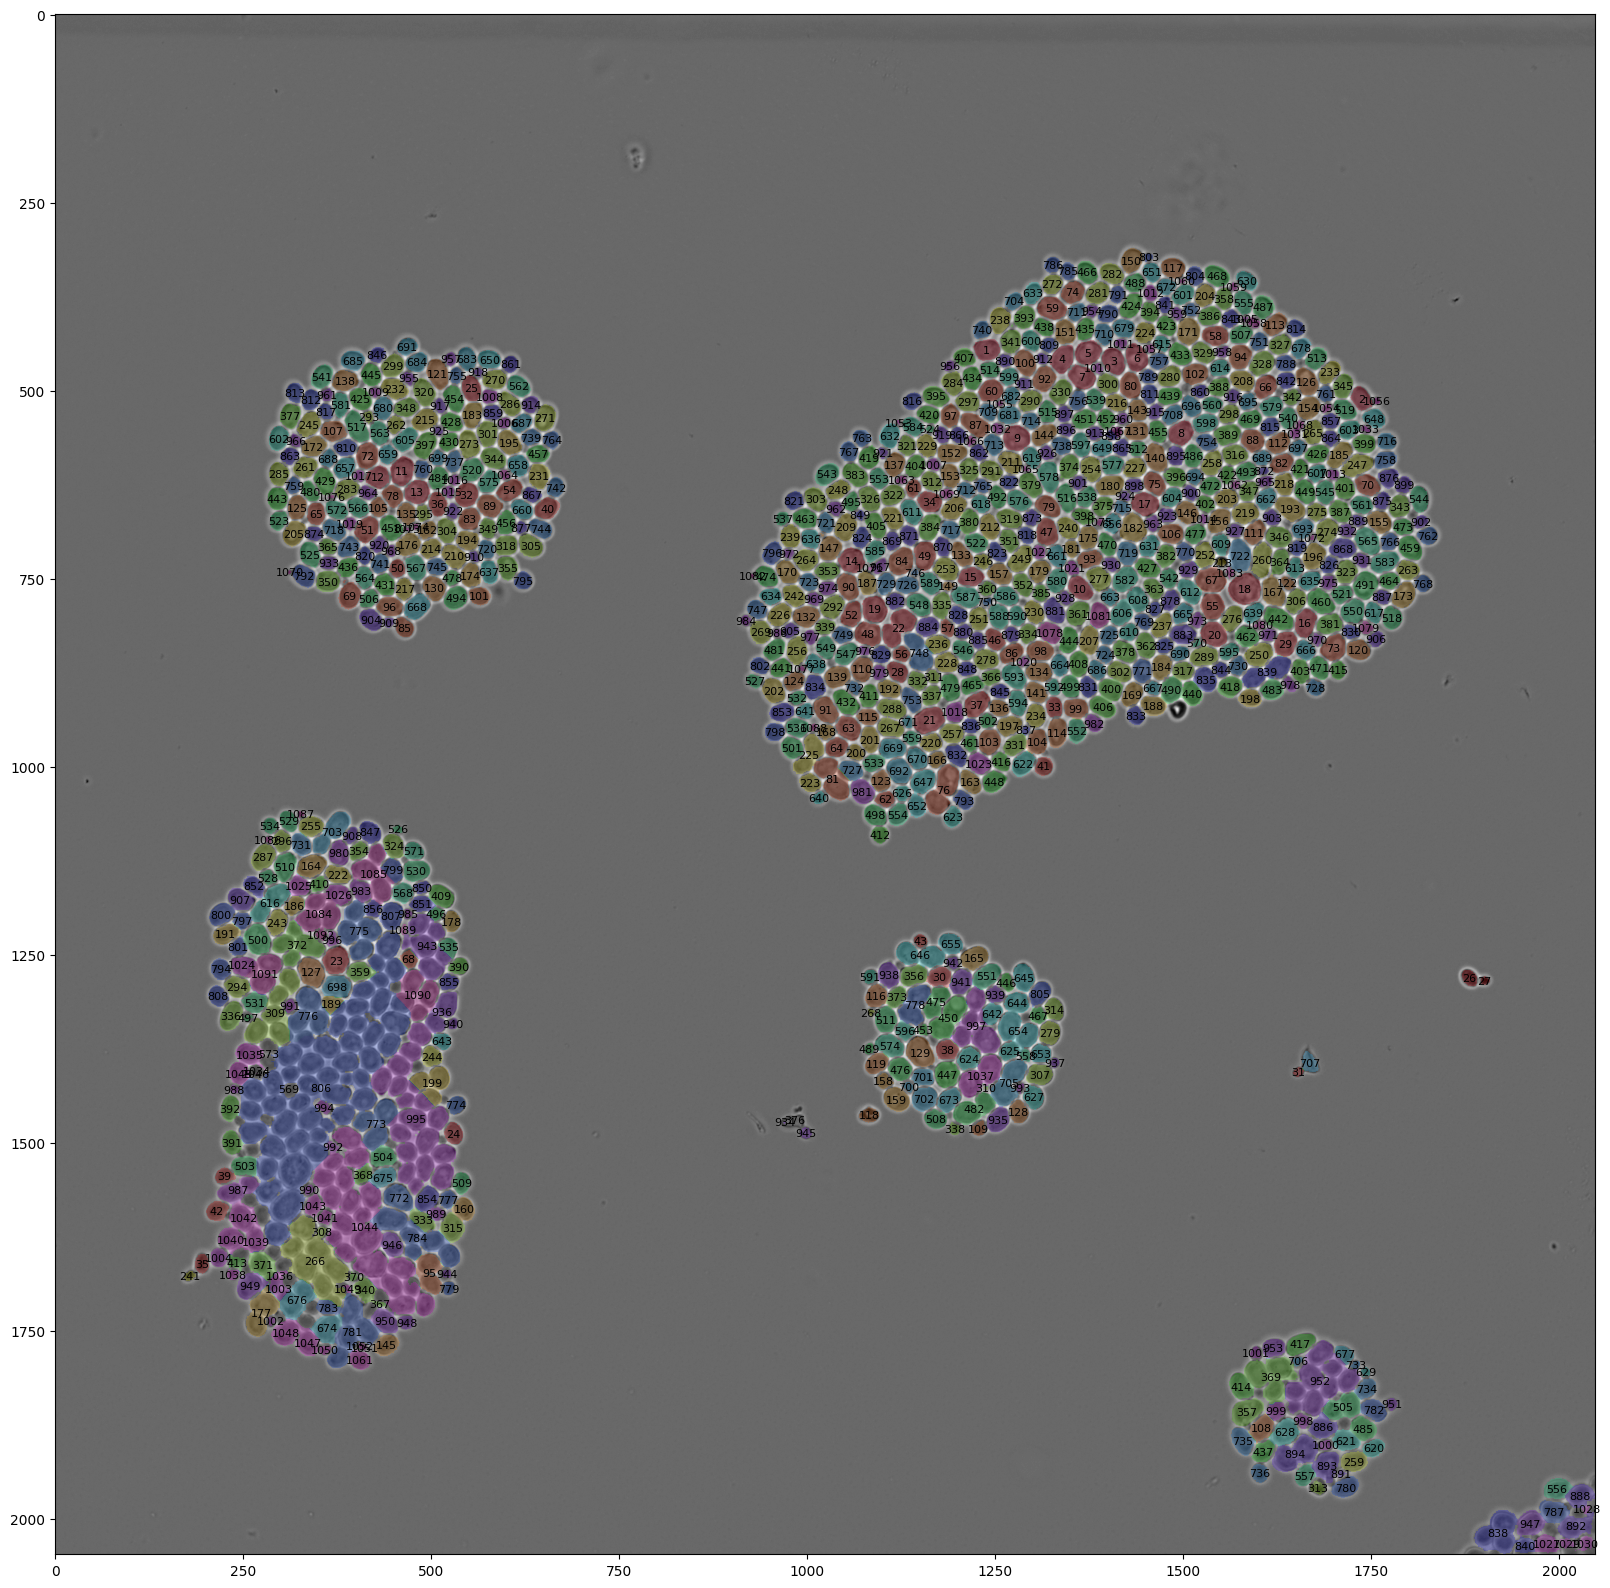

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))
vis.plot_visible(Microscopy.from_tiff(datadir / 'BFdivide_position020300_time0104.tif'), 0, figax=(fig, ax))
vis.plot_segmentation(seg, 103, figax=(fig, ax), alpha=0.2)

In [7]:
seg.write_h5(datadir / 'TTD_SCerevisiae_7_segmented_raw__time_001_to_104.h5')

In [17]:
def stack_tifs(filepaths, outpath):
	arr0 = tifffile.imread(filepaths[0])
	arr = np.zeros((len(filepaths), *arr0.shape))
	for i, filepath in enumerate(filepaths):
		arr[i] = tifffile.imread(filepath)
	tifffile.imsave(outpath, arr[None, :])

stack_tifs(
	list(sorted(glob.glob(str(datadir / 'BFdivide_position020300_time*.tif'))))[:104],
	datadir / 'BFdivide_position020300__time_001_to_104.tif'
)